In [34]:
# For development purposes, reload imported modules when source changes
%load_ext autoreload
%autoreload 2

import spikeextractors as si
import spikewidgets as sw
import os, sys
import numpy as np

from mountainlab_pytools import mlproc as mlp
from mountainlab_pytools import mdaio

from gen_synth_datasets import gen_synth_datasets

import h5py
import json

from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
#templates='kbucket://b5ecdf1474c5/MEArec/templates/templates_30_Neuronexus-32.h5'
templates='kbucket://b5ecdf1474c5/MEArec/templates/templates_30_tetrode_mea.h5'
K=8

datasets=[]
ds0=dict(
    duration=600,
    noise_level=0,
    templates=templates,
    n_exc=int(K/2), n_inh=K-int(K/2),
    f_exc=2, f_inh=7,
    min_rate=0.5,
    st_exc=1, st_inh=3,
    channel_ids=None
)
num_datasets=1

for j in range(1,num_datasets+1):
    ds=dict(        
        name='{}_synth'.format('{0:03d}'.format(j)),
        seed=j
    )
    for key in ds0:
        ds[key]=ds0[key]
    datasets.append(ds)
    
print('DATASETS:')
for ds in datasets:
    print(ds['name'])

DATASETS:
001_synth


In [38]:
 gen_synth_datasets(datasets,outdir='datasets')

001_synth


/home/magland/miniconda3/envs/devel/lib/python3.6/site-packages/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(other, self)
/home/magland/miniconda3/envs/devel/lib/python3.6/site-packages/scipy/signal/signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]


Done.


In [39]:
IX=si.MdaInputExtractor(dataset_directory='datasets/001_synth')
OX=si.MdaOutputExtractor(firings_file='datasets/001_synth/firings_true.mda')

In [42]:
sw.TimeseriesWidget(input_extractor=IX).display()

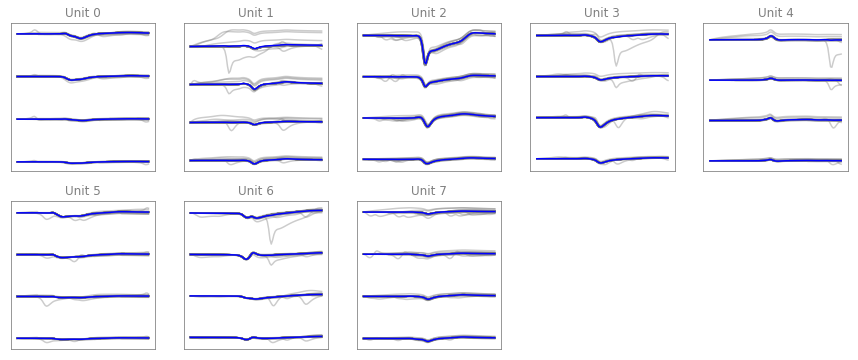

In [41]:
sw.UnitWaveformsWidget(input_extractor=IX,output_extractor=OX,snippet_len=100,height=10).plot()